In [470]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [471]:
df=pd.read_excel('nowy.xlsx')

In [472]:
df.head()

,Unnamed: 0,Researchers,Technicians,Articles,Expenditures for R&D,High-technology exports,Patent,Trademark,Industrial impact
0,Afghanistan,..,..,80,..,..,..,..,..
1,Albania,156,40,191,0.15,1,14,918,14
2,Algeria,168,34,"4,447",0.07,8,106,"8,104.0","1,181.0"
3,American Samoa,..,..,..,0.39,..,..,..,..
4,Andorra,..,..,8,..,16,..,618,..


In [473]:
df=df.dropna()

In [474]:
df[df.loc[:,:]=='..']=0

In [475]:
df.columns.values

array(['Unnamed: 0', 'Researchers', 'Technicians', 'Articles',
       'Expenditures for R&D', 'High-technology exports', 'Patent ',
       'Trademark ', 'Industrial impact'], dtype=object)

In [476]:
df=df.astype(str)

In [477]:
df=df.replace(',', '', regex=True)

In [478]:
df1= df[['Researchers', 'Technicians', 'Articles',
       'Expenditures for R&D', 'High-technology exports', 'Patent ',
       'Trademark ', 'Industrial impact']].apply(pd.to_numeric)

In [479]:
df1['country']=df['Unnamed: 0']

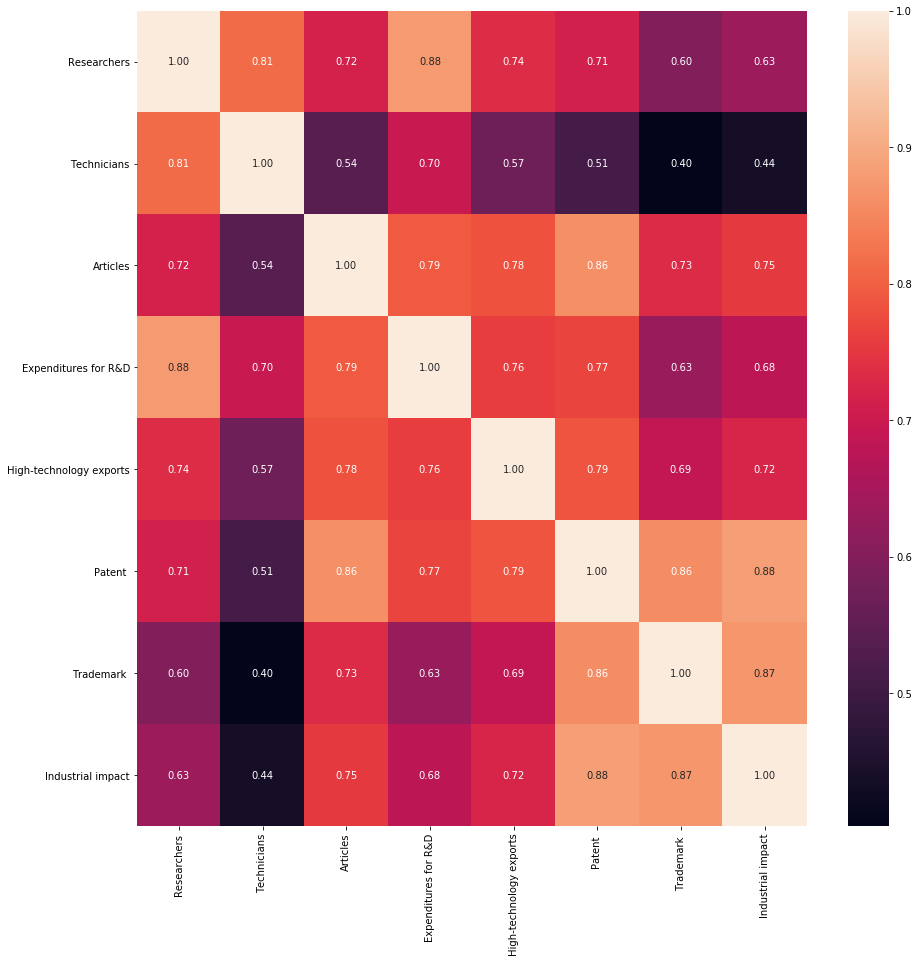

In [480]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(method='spearman'), annot=True, fmt=".2f",xticklabels=1,yticklabels=1)
plt.savefig('reaserch.png')

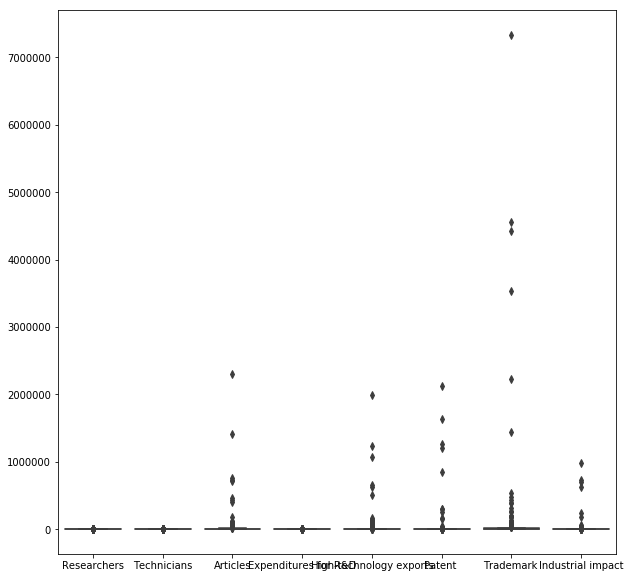

In [481]:
plt.figure(figsize=(10,10))
sns.boxplot( data=df1)

C:\Users\Kacper\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


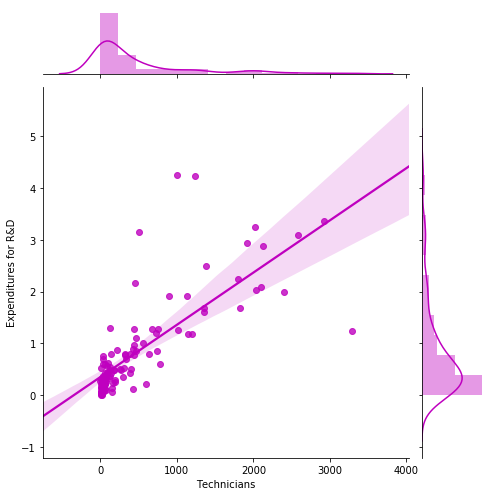

In [482]:
sns.jointplot("Technicians", "Expenditures for R&D", data=df1[df1.iloc[:,:-1]>0], kind="reg", color="m", height=7)
plt.savefig('reaserch1.png')

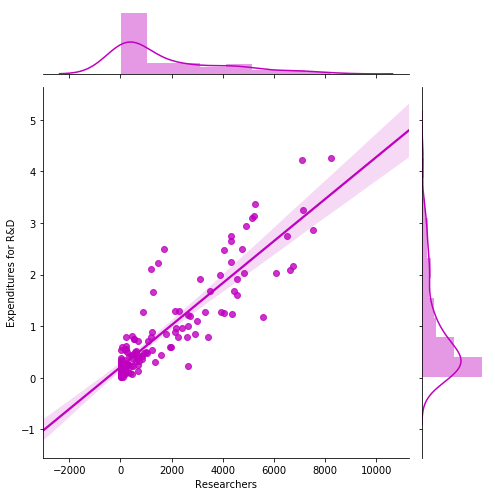

In [483]:
sns.jointplot("Researchers", "Expenditures for R&D",data=df1[df1.iloc[:,:-2]>0], kind="reg", color="m", height=7)
plt.savefig('reaserch2.png')

<Figure size 1440x1440 with 0 Axes>

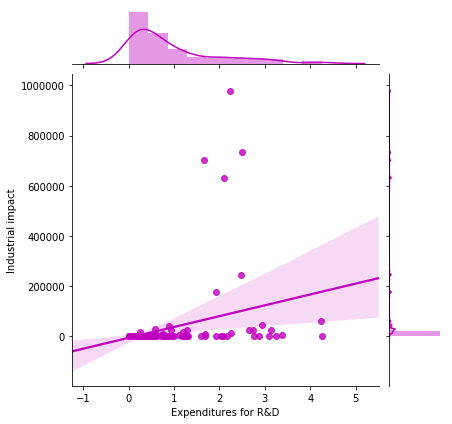

In [485]:
plt.figure(figsize=(20,20))
sns.jointplot("Expenditures for R&D", "Industrial impact",data=df1[df1.iloc[:,:-1]>0], kind="reg", color="m")
plt.savefig('reaserch3.png')

In [487]:
# scaler = StandardScaler()
data=scaler.fit_transform(df1.iloc[:,:-1].fillna(0))

C:\Users\Kacper\Anaconda31\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kacper\Anaconda31\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [488]:
df1['kmean']=KMeans(n_clusters=4, random_state=0).fit_predict(data)

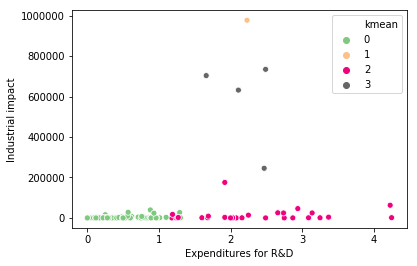

In [490]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Expenditures for R&D", y="Industrial impact",
                     hue="kmean",  palette="Accent",
                      sizes=(10, 200),
                     data=df1)
plt.savefig('reaserch4.png')

In [491]:
df2=df1[~df1['country'].isin(['China','World', 'High income','East Asia & Pacific', 'Europe & Central Asia',
       'Upper middle income','North America','Lower middle income','Latin America & Caribbean','Middle East & North Africa','South Asia'])]

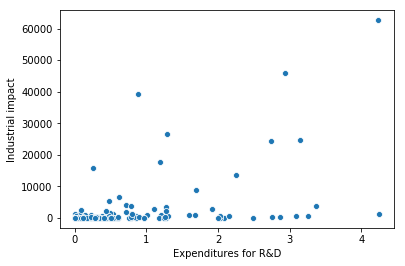

In [492]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Expenditures for R&D", y="Industrial impact",
                       palette="Accent",
                      sizes=(10, 200),
                     data=df2)
plt.savefig('reaserch4.png')

In [493]:
scaler = StandardScaler()
data=scaler.fit_transform(df2.iloc[:,:-2].fillna(0))

C:\Users\Kacper\Anaconda31\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kacper\Anaconda31\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [494]:
df2['kmean']=KMeans(n_clusters=3, random_state=0).fit_predict(data)

C:\Users\Kacper\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


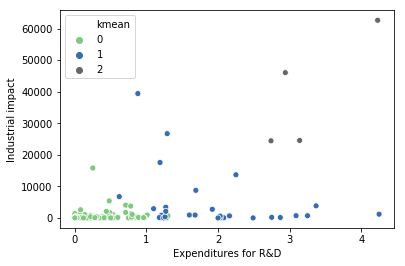

In [495]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Expenditures for R&D", y="Industrial impact",
                       palette="Accent",hue='kmean',
                      sizes=(10, 200),
                     data=df2)
plt.savefig('reaserch5.png')